# Lab for module 3 lesson 3

Topics covered
- Relationship between attributes
- Visualizing categoric features and proportions

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

In [1]:
# reading the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")
sales = pd.read_csv('sales_data.csv')

In [3]:
sales.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002


### Q1. What is the correlation between sales and profit?

In [4]:
# write your code here
np.corrcoef(sales['sales'],sales['profit'])

array([[1.        , 0.48491811],
       [0.48491811, 1.        ]])

### Q2. Create a table of correlations between sales, profit, quantity and discount. Also display this a heatmap.

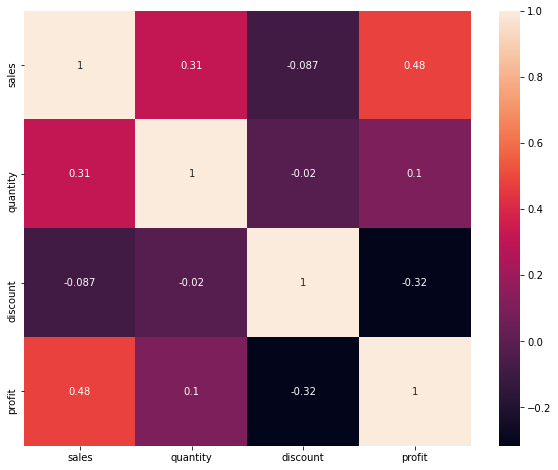

In [9]:
# write your code here
corr = sales[['sales','quantity','discount','profit']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

### Q3. Create a scatter plot of sales vs profit. What do you observe?

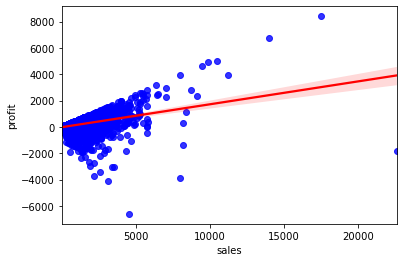

In [10]:
# write your code here
plt.figure(figsize=(6,4))
sns.regplot(x='sales',y='profit',data=sales,scatter_kws={"color":"blue"},line_kws={'color':'red'})
plt.show()

- Spread is very high, but still correlation exists. With increase in sales, profit increases

### Q4. Create a table showing the total sales by category and also plot this as a pie chart and as a bar plot. Does creating both plots give you a better sense of when to use a bar and when to use a pie?

          category         sales
0        Furniture  4.110874e+06
1  Office Supplies  3.787070e+06
2       Technology  4.744557e+06


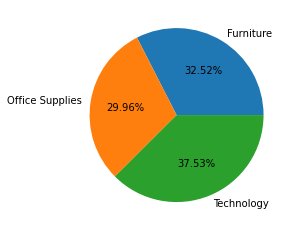

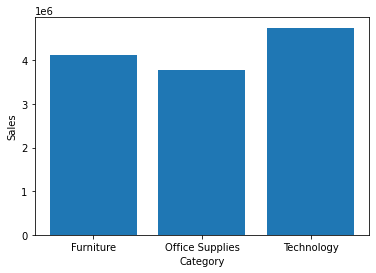

In [18]:
# write your code here
# sales by category
df = sales.groupby('category')['sales'].sum().reset_index()
print(df)

# pie chart
plt.figure(figsize=(6,4))
plt.pie(df['sales'],labels = df['category'],\
       autopct = "%0.2f%%",textprops = {'fontsize':10})
plt.show()

# bar plot
plt.figure(figsize=(6,4))
plt.bar(df['category'],df['sales'])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()



### Q5. Display the scatterplot of all pairs of numeric variables in a single plot

In [15]:
sales.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001


<Figure size 432x288 with 0 Axes>

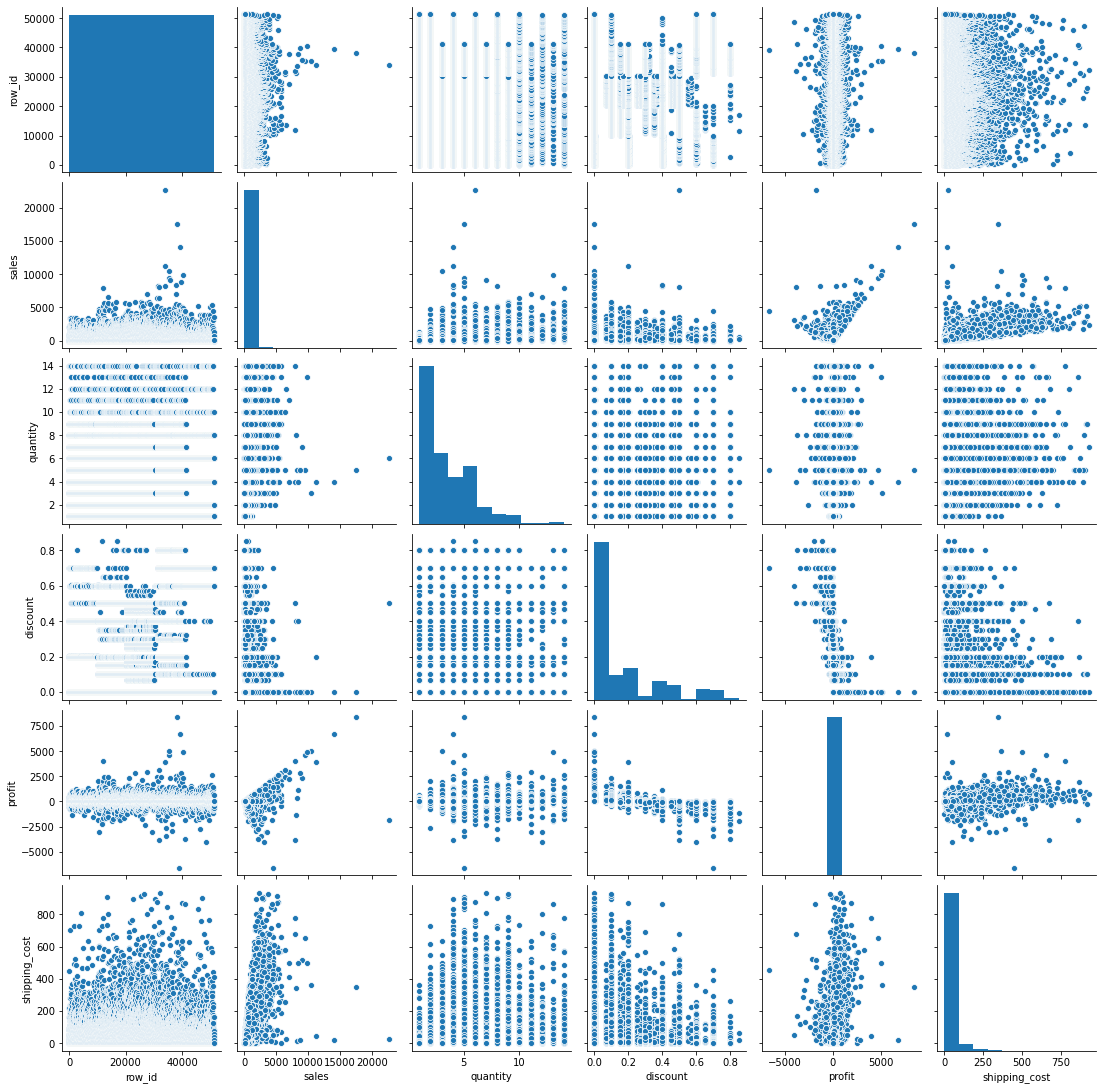

In [14]:
# write your code here
plt.figure(figsize=(6,4))
sns.pairplot(data=sales)
plt.show()

## Solutions

In [7]:
# Q1 - 
print(f"Using Pandas :- Correlation between sales and profit is : {sales.corr()['sales']['profit']}")

print(f"Using Numpy :- Correlation between sales and profit is : {np.corrcoef(sales['sales'],sales['profit'])[0,1]}")

Using Pandas :- Correlation between sales and profit is : 0.4849181126194469
Using Numpy :- Correlation between sales and profit is : 0.48491811261944456


In [8]:
# Q2 - 
sales.corr()

,row_id,sales,quantity,discount,profit,shipping_cost
row_id,1.000000,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
sales,-0.043889,1.000000,0.313577,-0.086722,0.484918,0.768073
quantity,-0.173483,0.313577,1.000000,-0.019875,0.104365,0.272649
discount,0.087594,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
profit,-0.019037,0.484918,0.104365,-0.316490,1.000000,0.354441
shipping_cost,-0.039078,0.768073,0.272649,-0.079056,0.354441,1.000000


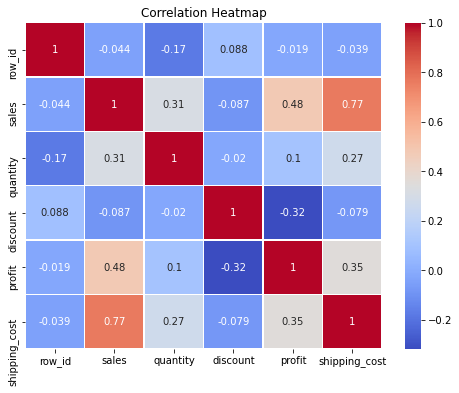

In [9]:
# Create a heatmap using Seaborn
corr_matrix=sales.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

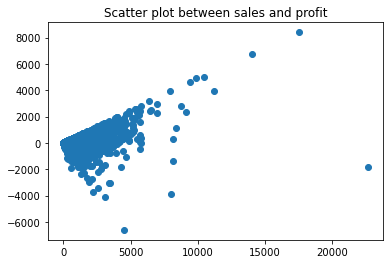

<Figure size 432x288 with 0 Axes>

In [10]:
# Q3 - 
plt.scatter(sales['sales'],sales['profit'])
plt.title('Scatter plot between sales and profit')
plt.show()
plt.tight_layout()

sales & profit seem to be directly correlated.

          category         sales
0        Furniture  4.110874e+06
1  Office Supplies  3.787070e+06
2       Technology  4.744557e+06


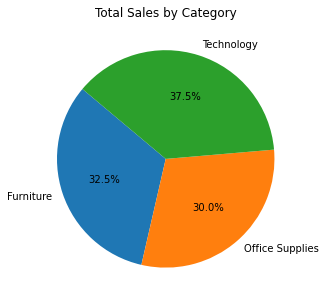

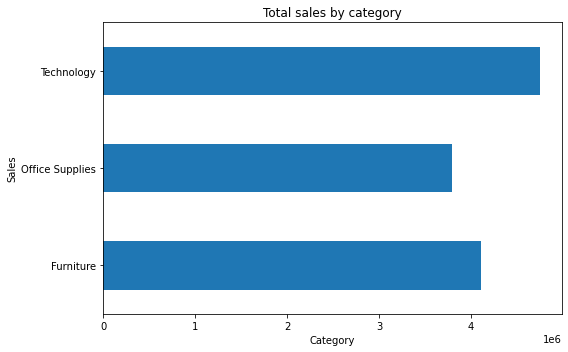

In [11]:
#Q.4 -
# Create a pie chart
sales_cat=sales.groupby('category')['sales'].sum().reset_index()

print(sales.groupby('category')['sales'].sum().reset_index())
categories = sales_cat['category']
sales_val =sales_cat['sales']

plt.figure(figsize=(8, 5))  # Set the figure size
plt.pie(sales_val, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by Category')
# Show the pie chart
plt.show()



##### Bar plot
plt.figure(figsize=(8, 5))  # Set the figure size
sales.groupby('category')['sales'].sum().plot(kind='barh')
plt.title('Total sales by category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.tight_layout()

With less than 5 categories using pie chart is preferred while if we have number of categories >5 then using bar chart makes more sense.

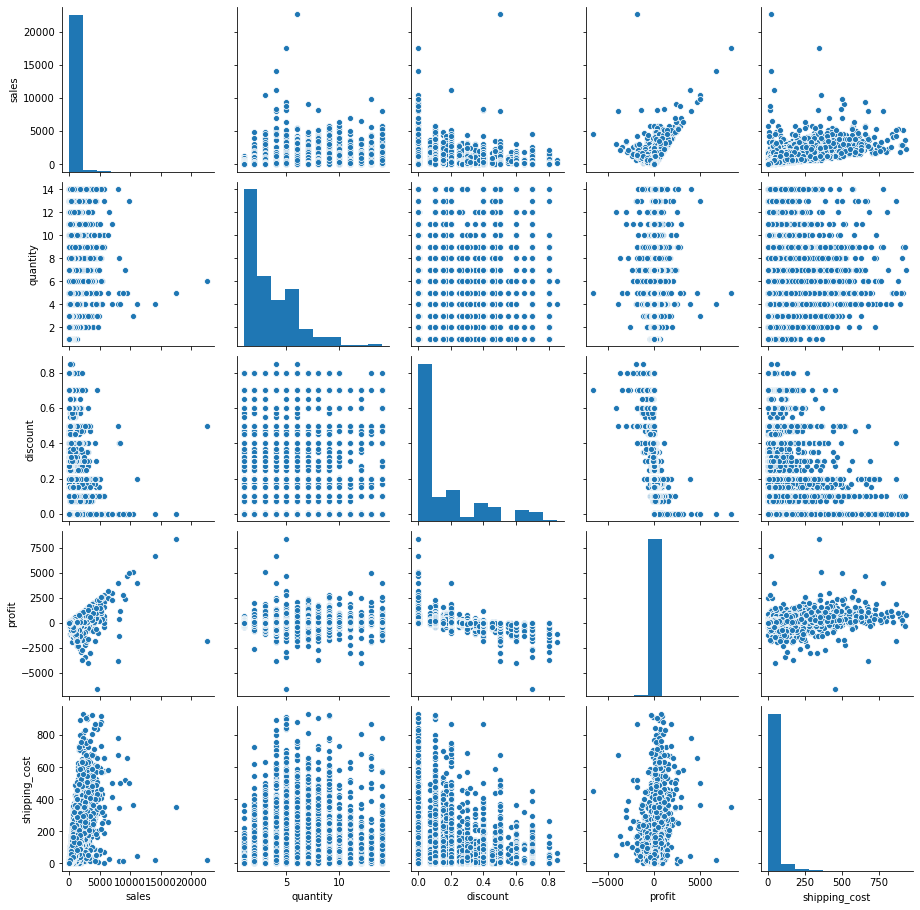

In [12]:
# Q5 - 
sns.pairplot(sales.drop(columns={'row_id'}))